# Power Line Interference Cancellation of an ECG Signal using Adaptive Filters

**By Karolinska Institutet**

__Content creator:__ Fardin Afdideh

## Problem Statement & Objectives
* One source of interference in ECG recording is the electromagnetic coupling from the power supply.
* Remove power line interference using adaptive filters, i.e., Adaptive Noise Cancelling (ANC), as shown in the following figure:
![Adaptive Noise Cancelling (ANC)](https://www.mathworks.com/help/dsp/ug/adapt_cancelnoise.png)

where, the desired signal, d, is the recorded/simulated noisy ECG, the input signal, x, is the generated sinusoidal signal with the power line frequency, and the error signal, e, is the reconstructed noiseless ECG.   

## Installs
* [Padasip](https://matousc89.github.io/padasip/index.html): Python Adaptive Signal Processing Library
* [Neurokit](https://github.com/neuropsychology/NeuroKit): The Python Toolbox for Neurophysiological Signal Processing

In [ ]:
!pip install padasip
!pip install neurokit2

### Imports


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, butter
import neurokit2 as nk
import padasip as pa

### Synthetic ECG Generation (Clean Signal)

In [ ]:
def generate_ecg_signal(sampling_rate=500, duration=2):
    t = np.linspace(0, duration, sampling_rate * duration)
    ecg_clean = nk.ecg_simulate(duration=duration, heart_rate=70, sampling_rate=sampling_rate)
    return t, ecg_clean

### Powerline Noise Simulation (50Hz Interference)

In [ ]:
def generate_noise(t, noiseAmp=1):
    noise = noiseAmp * np.sin(2 * np.pi * 50 * t)  # Powerline noise at 50 Hz
    return noise

### Noisy ECG (d) and Input (x) Signals

In [ ]:
n = 2 # size (number of taps) of the filter
mu = 0.01 # learning rate (step size) in range from 0.1 to 0.00001

t, ecg_clean = generate_ecg_signal()
noise_orig = generate_noise(t)
ecg_noisy = ecg_clean + noise_orig
noise_est = generate_noise(t, noiseAmp=1)
noise_est = np.tile(noise_est[:, np.newaxis], (1, n))

### Adaptive Filtering

In [ ]:
model="LMS" # {LMS, NLMS}
y, e, w = pa.filters.filter_data(ecg_noisy, noise_est, model=model, mu=mu, n=n, w="random")

### Visualization (Clean, Noisy, and Filtered Signals)

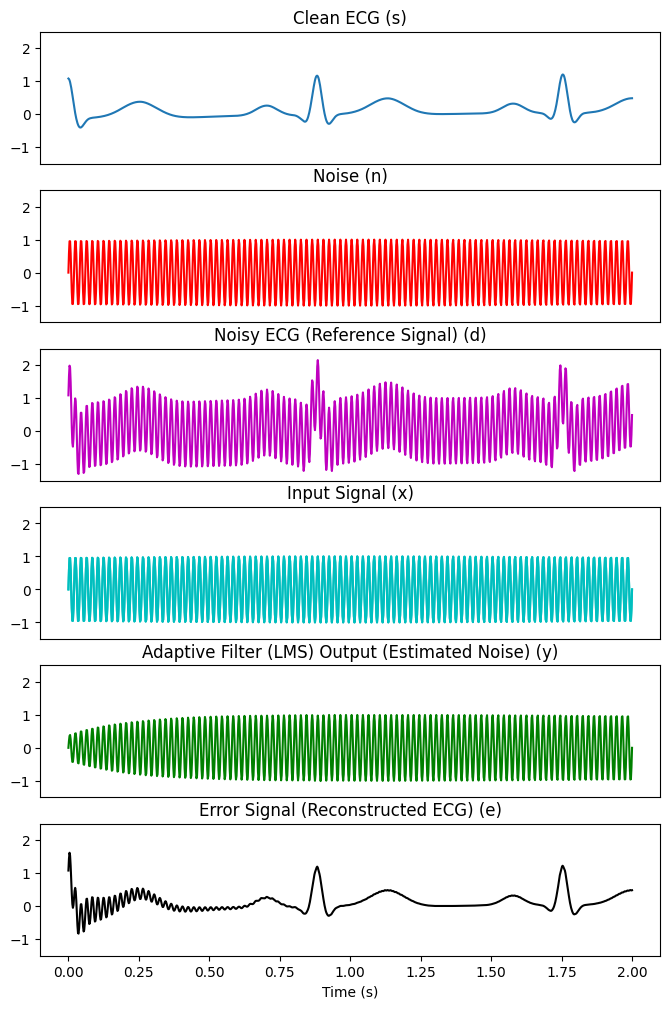

In [ ]:
# Plot Results
ylim = (-1.5,2.5)
plt.figure(figsize=(8,12))
plt.subplot(6,1,1)
plt.plot(t, ecg_clean, label='Clean ECG (s)')
plt.title('Clean ECG (s)')
plt.ylim(ylim)
plt.xticks([])

plt.subplot(6,1,2)
plt.plot(t, noise_orig, label='Noise (n)', color='r')
plt.title('Noise (n)')
plt.ylim(ylim)
plt.xticks([])

plt.subplot(6,1,3)
plt.plot(t, ecg_noisy, label='Noisy ECG (Reference Signal) (d)', color='m')
plt.title('Noisy ECG (Reference Signal) (d)')
plt.ylim(ylim)
plt.xticks([])

plt.subplot(6,1,4)
plt.plot(t, noise_est, label='Input Signal (x)', color='c')
plt.title('Input Signal (x)')
plt.ylim(ylim)
plt.xticks([])

plt.subplot(6,1,5)
plt.plot(t, y, label=f'Adaptive Filter ({model}) Output (Estimated Noise) (y)', color='g')
plt.title(f'Adaptive Filter ({model}) Output (Estimated Noise) (y)')
plt.ylim(ylim)
plt.xticks([])

plt.subplot(6,1,6)
plt.plot(t, e, label='Error Signal (Reconstructed ECG) (e)', color='k') # (MAE={np.mean(np.abs(e)):.2f})
plt.title('Error Signal (Reconstructed ECG) (e)')
plt.ylim(ylim)

plt.xlabel('Time (s)')
plt.show()